================================> Tutorial - 3 <====================================

Exercise 1: K-Nearest Neighbor

Let us implement the algorithm with the help of the 'Mobile.csv' dataset.

It contains data about customers “Age”, “EstimatedSalary”, “Purchased” .

Download the dataset from the shared folder.


Predict if the customer will purchase a mobile or not.

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;


1. load data : mobile.csv

In [3]:
df = pd.read_csv("Datasets/mobile.csv")

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df['Purchased'].unique()

array([0, 1])

In [10]:
purchased_data = df[["Age" , "EstimatedSalary", "Purchased"]] [df["Purchased"] == 1]
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [11]:
not_purchased_data = df[["Age" , "EstimatedSalary", "Purchased"]] [df["Purchased"] == 0]
not_purchased_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
377,42,53000,0
380,42,64000,0
387,39,71000,0
394,39,59000,0


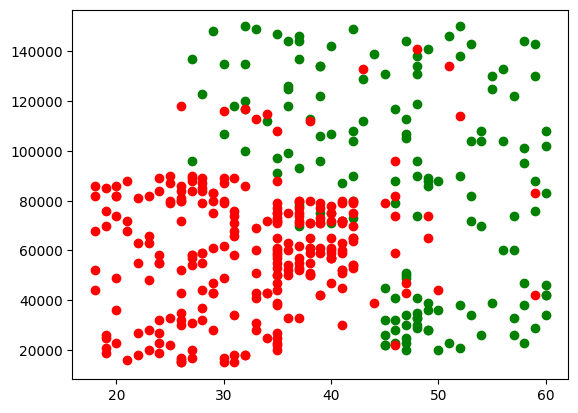

In [12]:
plt.scatter(purchased_data["Age"], purchased_data["EstimatedSalary"], color="green")
plt.scatter(not_purchased_data["Age"], not_purchased_data["EstimatedSalary"], color="red")

In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
df["EstimatedSalary"].max()

np.int64(150000)

In [15]:
df["EstimatedSalary"].min()

np.int64(15000)

In [16]:
df["Age"].max()

np.int64(60)

In [17]:
df["Age"].min()

np.int64(18)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_of_scale = ["Age", "EstimatedSalary"]
scaled_values = scaler.fit_transform(df[features_of_scale])

In [19]:
df["norm_age"] = scaled_values[:,0]
df["norm_salary"] = scaled_values[:,1]

In [20]:
df

,Age,EstimatedSalary,Purchased,norm_age,norm_salary
0,19,19000,0,0.023810,0.029630
1,35,20000,0,0.404762,0.037037
2,26,43000,0,0.190476,0.207407
3,27,57000,0,0.214286,0.311111
4,19,76000,0,0.023810,0.451852
...,...,...,...,...,...
395,46,41000,1,0.666667,0.192593
396,51,23000,1,0.785714,0.059259
397,50,20000,1,0.761905,0.037037
398,36,33000,0,0.428571,0.133333


In [21]:
df["norm_age"].min()

np.float64(0.0)

In [22]:
df["norm_age"].max()

np.float64(0.9999999999999998)

In [23]:
df["norm_salary"].min()

np.float64(0.0)

In [24]:
df["norm_salary"].max()

np.float64(1.0)

In [25]:
X = df[['norm_age', 'norm_salary']]
y = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)


Shape of X_train (320, 2)
Shape of X_test (80, 2)
Shape of y_train (320,)
Shape of y_test (80,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
model.fit(X_train, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [28]:
model.score(X_train, y_train) * 100

91.875

In [30]:
model.score(X_test, y_test) * 100

95.0

Exercise 2: SVM for classification

Consider the Iris dataset which provides measurements of sepal length, sepal width, petal length, and petal width for 50 flowers from each of 3 species. Total rows are 150.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris_data = pd.read_csv("Datasets/iris.csv")

In [4]:
iris_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


In [5]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris_data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
iris_data['Species'].unique()

<StringArray>
['setosa', 'versicolor', 'virginica']
Length: 3, dtype: str

Create Binary Class SVM model

In [9]:
v_nv_fn = lambda x: 0 if x=="versicolor" else 1

# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)

#iris_data[iris_data["v_nv"] == 0]
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


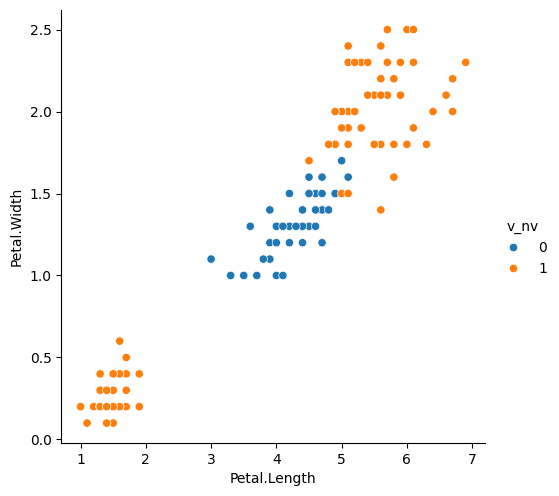

In [10]:
import seaborn as sns
sns.pairplot(iris_data, x_vars="Petal.Length", y_vars="Petal.Width", hue="v_nv", height=5)

In [11]:
from sklearn.svm import SVC
X = iris_data[["Petal.Length", "Petal.Width"]]
y = iris_data["v_nv"]
model = SVC()
model.fit(X,y)
model.score(X,y) * 100

95.33333333333334

Model Vizulatization

In [45]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 443.6 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 443.6 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 580.7 kB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 651.4 kB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 651.4 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 707.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


c:\Users\Saurav Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

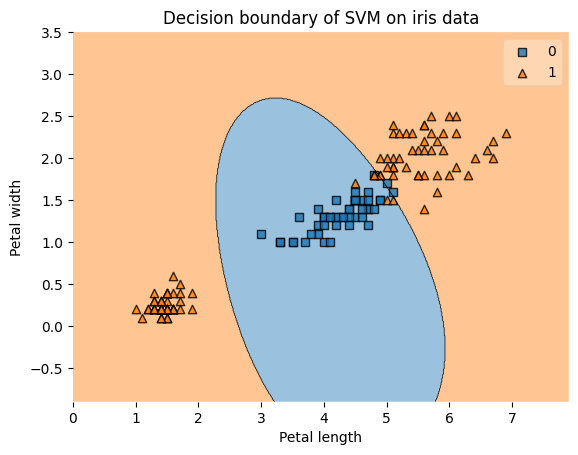

In [12]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(y)
plot_decision_regions(features, target, clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Decision boundary of SVM on iris data")

Create Multi Class SVM model

Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data["Species"] = le.fit_transform(iris_data["Species"])
iris_data


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [14]:
X = iris_data[["Petal.Length", "Petal.Width"]]
y = iris_data["Species"]
model = SVC()
model.fit(X,y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


c:\Users\Saurav Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

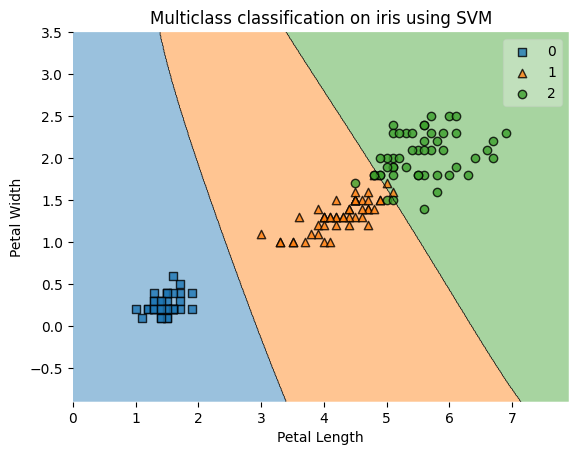

In [15]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(y)

plot_decision_regions(features,target, clf=model)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Multiclass classification on iris using SVM")